# Networks

Networkx: create a graph, centrality computation, distance between two nodes, clustering, IO
Gephi: binding and editing

From a computing point of view, networks are sets of node objects that have relationships to other nodes specified with link objects. There is an unlimited amount of information one can store in a node and a link, and each object can in principle be of a different class. As a datastructure, they are useful only when we have a need to atomize information in the form of nodes and we have a way of relating these nodes to each other in the form of links.

Mathematically the study of networks is called graph theory, and a node is called a vertex while a link is called an edge. Networks are are especially usefull today when we deal with complex phenomena, such as infrastructure including IT, social sciences and biology.

The most popular tools for networks in biology are two Java programs, [Cytoscape](http://www.cytoscape.org/) and [Gephi](http://gephi.github.io/) and they both have Python bindings. Among the graph libraries for Python, I can reccommend [igraph](http://igraph.org), a library that is multilanguage (Python, R and C) and [NetworkX](https://networkx.github.io/) which is slower but has a very Pythonic design. We will introduce graph concepts with the help of NetworkX.

### Basics

Let us create and display a small graph.

[1, 2, 3, 'hey']
[(1, 2), (1, 3), (2, 3), (3, 'hey')]
[2, 3]
[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 'hey'), ('hey', 3)]


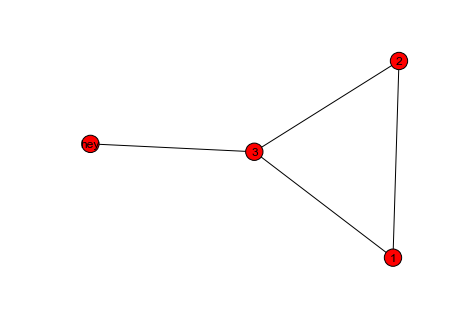

In [1]:
import networkx as nx
G=nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3,"hey"])
print G.nodes()

G.add_edge(1,2)
e=(2,3)
G.add_edge(*e)
G.add_edges_from([(1,2),(1,3), (3, 'hey')])
print G.edges()

print G.neighbors(1)

H=nx.DiGraph(G)   # create a DiGraph using the connections from G
print H.edges()

G[1][3]['color']='blue'

%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)
plt.savefig("data/graph.png")

**Atrributes**

You can assign any type of data as attributes to nodes, edges and graphs. Most commonly we assign a weight to edges and a label to nodes. NetworkX uses Python dictionaries to store attributes so the only limitations are those a Python dictionary has.

{1: ('May', 1), 'foo': 'spam'}
[(1, 2, {'color': 'blue', 'weight': 4}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red'}), (4, 5, {'color': 'red'})]
[(1, {'room': 714}), (2, {'name': 'tiny'}), (3, {}), (4, {}), (5, {})]


{1: <matplotlib.text.Text at 0x7fa2f6d2fcd0>}

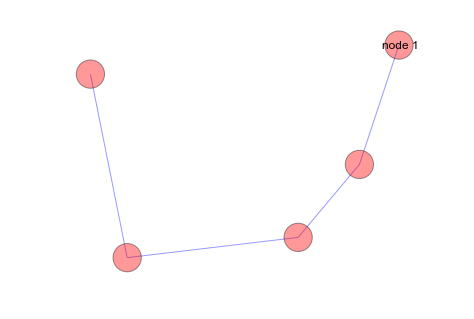

In [28]:
G=nx.Graph()
G.graph[1]=('May',1)
G.graph['foo']='spam'
print G.graph

G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4
print G.edges(data = True)

G.node[1]['room'] = 714
G.node[2]['name'] = 'tiny'
print G.nodes(data = True)

%matplotlib inline
import matplotlib.pyplot as plt
#nx.draw(G)
pos = nx.spring_layout(G)
labels = {1: "node 1" }
nx.draw(G, pos, with_labels=False, node_size = 800, edge_color = 'b', alpha = 0.4)
nx.draw_networkx_labels(G, pos, labels, fontsize=14)

**How far are two nodes? Paths and centralities.**

Among the many measurements possible in graphs, paths and centrality values are probably the most common. You can save attribute values along with the graph in some cases, or export them in excel and load them separately in your network program of choice.

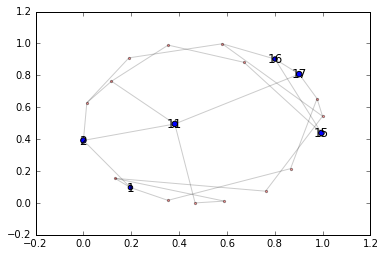

In [3]:
import networkx as nx
G = nx.newman_watts_strogatz_graph(20, 3, 0.5, seed=None)
#G = nx.barabasi_albert_graph(100, 50)
#G = nx.gnm_random_graph(200, 150)

path = nx.shortest_path(G, 1, 15)
#print len(path), path
labels = {n:str(n) for n in path}
rest = set(G.nodes())-set(path)

d = nx.degree(G)
#size=[d[n] * 50 for n in d if n in path]
size=[d[n] * 10 for n in d]

%matplotlib inline
import matplotlib.pyplot as plt
#pos = nx.spring_layout(G)
#nx.draw(G, pos, node_size = 100, alpha = 0.4)

pos = nx.spring_layout(G, k = 1/float(3))
#pos = nx.spectral_layout(G, scale = 0.2)

nx.draw_networkx_nodes(G, pos, nodelist = path, node_color="b", node_size = size)
nx.draw_networkx_nodes(G, pos, nodelist = list(rest), node_color="r", node_size = 5, alpha = 0.4)

nx.draw_networkx_edges(G, pos, alpha = 0.2)
nx.draw_networkx_labels(G, pos, labels)
plt.show()

Task: Generate a graph with preferential attachment - links are more probable between nodes with high degree. Plot the degree distribution and draw a network figure in which nodes are labeled with their betwenesss centrality and have the size proportional to their degree. For an extra bit of amusement, try to animate the growth. This is possible with matplotlib, but an external program like Gephi is much better.